In [184]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

carga del dataset



In [185]:
data = pd.read_csv('./diamonds.csv')

In [186]:
cut = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
data['cut'] = data['cut'].map(cut)


color = {'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
data['color'] = data['color'].map(color)


clarity = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
data['clarity'] = data['clarity'].map(clarity)



In [187]:
X = data[['carat','cut','color','clarity','depth','table','x','y','z']]
y = data['price']

m= y.size

In [188]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [189]:
print(X)

       carat  cut  color  clarity  depth  table     x     y     z
0       0.23    4      5        1   61.5   55.0  3.95  3.98  2.43
1       0.21    3      5        2   59.8   61.0  3.89  3.84  2.31
2       0.23    1      5        4   56.9   65.0  4.05  4.07  2.31
3       0.29    3      1        3   62.4   58.0  4.20  4.23  2.63
4       0.31    1      0        1   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    4      6        2   60.8   57.0  5.75  5.76  3.50
53936   0.72    1      6        2   63.1   55.0  5.69  5.75  3.61
53937   0.70    2      6        2   62.8   60.0  5.66  5.68  3.56
53938   0.86    3      2        1   61.0   58.0  6.15  6.12  3.74
53939   0.75    4      6        1   62.2   55.0  5.83  5.87  3.64

[53940 rows x 9 columns]


In [190]:
print(y)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64


GRAFICAR DATOS

In [191]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [192]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       carat  cut  color  clarity  depth  table     x     y     z
0       0.23    4      5        1   61.5   55.0  3.95  3.98  2.43
1       0.21    3      5        2   59.8   61.0  3.89  3.84  2.31
2       0.23    1      5        4   56.9   65.0  4.05  4.07  2.31
3       0.29    3      1        3   62.4   58.0  4.20  4.23  2.63
4       0.31    1      0        1   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    4      6        2   60.8   57.0  5.75  5.76  3.50
53936   0.72    1      6        2   63.1   55.0  5.69  5.75  3.61
53937   0.70    2      6        2   62.8   60.0  5.66  5.68  3.56
53938   0.86    3      2        1   61.0   58.0  6.15  6.12  3.74
53939   0.75    4      6        1   62.2   55.0  5.83  5.87  3.64

[53940 rows x 9 columns]
Media calculada: carat       0.797940
cut         2.904097
color       3.405803
clarity     3.051020
depth      61.749405
table      57.457184
x           5.731157
y           5.7345

In [193]:
def graficarDatos(x, y, xlabel, ylabel): 
    fig = pyplot.figure() 
    pyplot.plot(x, y, 'ro') 
    pyplot.xlabel(xlabel) 
    pyplot.ylabel(ylabel)

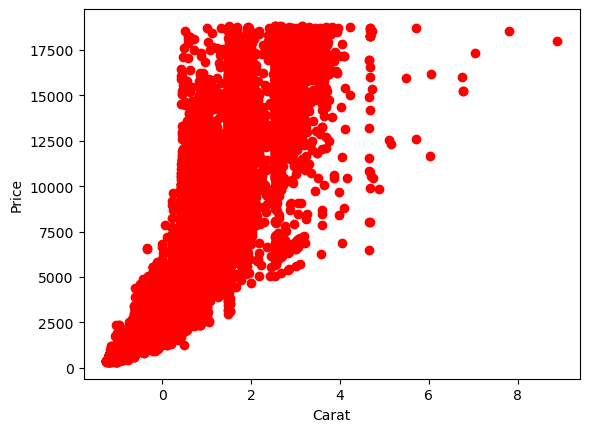

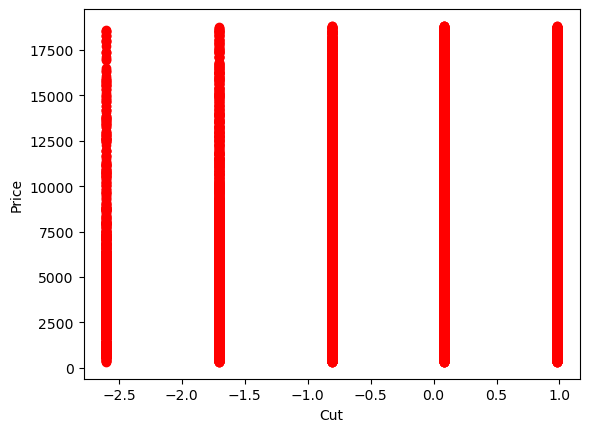

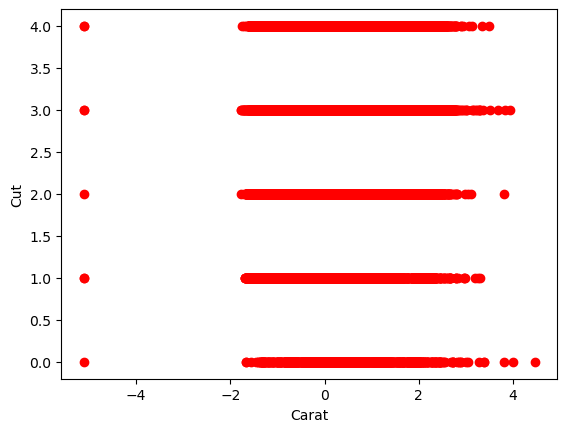

In [194]:
xlabel1 = "Carat"
xlabel2 = "Cut"
ylabel1 = "Price"

# Graficar con sintaxis de pandas usando .iloc
graficarDatos(X_norm.iloc[:,0], y, xlabel1, ylabel1)
graficarDatos(X_norm.iloc[:,1], y, xlabel2, ylabel1) 
graficarDatos(X_norm.iloc[:,6], X.iloc[:,1], xlabel1, xlabel2)

In [195]:

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -1.19816781  0.98147332 ... -1.58783745 -1.53619556
  -1.57112919]
 [ 1.         -1.24036129  0.08588908 ... -1.64132529 -1.65877419
  -1.74117497]
 [ 1.         -1.19816781 -1.70527938 ... -1.49869105 -1.45739502
  -1.74117497]
 ...
 [ 1.         -0.20662095 -0.80969515 ... -0.06343409 -0.04774083
   0.03013526]
 [ 1.          0.13092691  0.08588908 ...  0.37338325  0.33750627
   0.28520393]
 [ 1.         -0.10113725  0.98147332 ...  0.08811478  0.11861587
   0.14349912]]


In [196]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [197]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

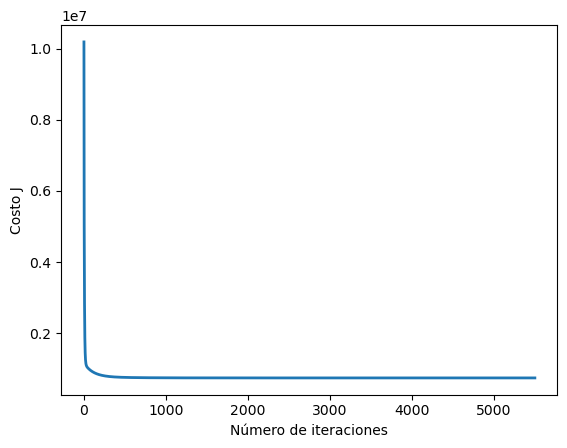

theta calculado por el descenso por el gradiente: [3932.79972191 5092.07966581  134.82473041  548.92842385  826.63977989
 -114.21063469  -59.79885346 -982.86583074   49.51609457  -21.28891275]
El precio predicho para el diamante de ejemplo (usando el descenso por el gradiente): $13422


In [198]:

alpha = 0.1
num_iters = 5500

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])  # ahora es del tamaño correcto (7 columnas)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.show()

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un diamante de ejemplo
X_array = [1, 3, 2, 1.0, 3.95, 3.98, 2.43, 0, 0]  # ejemplo de diamante
X_array = (np.array(X_array) - mu) / sigma  # normaliza
X_array = np.insert(X_array, 0, 1)  # agrega el 1 para el bias

price = np.dot(X_array, theta)  # predicción

print('El precio predicho para el diamante de ejemplo (usando el descenso por el gradiente): ${:.0f}'.format(price))


ECUACION DE LA NORMAL

In [199]:
# Cargar datos
data = pd.read_csv('./diamonds.csv')

cut = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
data['cut'] = data['cut'].map(cut)


color = {'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
data['color'] = data['color'].map(color)


clarity = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
data['clarity'] = data['clarity'].map(clarity)




X = data[['carat','cut','color','clarity','depth','table','x','y','z']]
y = data['price']
m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

53940


In [200]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [201]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1,1, 3, 2, 1.0, 3.95, 3.98, 2.43, 0, 0]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 3726.44917748 10743.90785634   120.75047339   322.69638962
   501.85579691   -79.79270192   -26.75952781  -877.63064102
    43.7354626    -29.33473944]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $13426


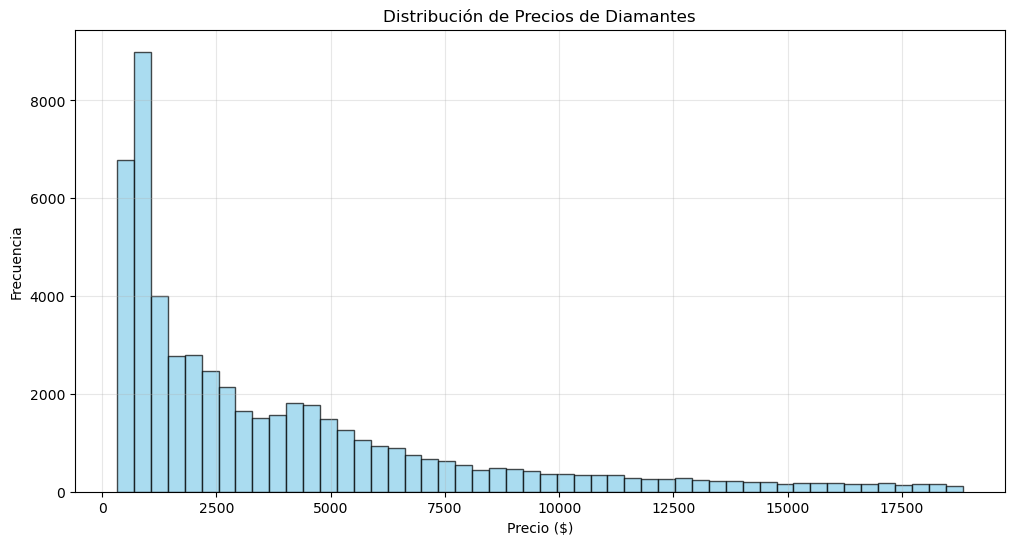

In [203]:
pyplot.figure(figsize=(12, 6))
pyplot.hist(y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
pyplot.xlabel('Precio ($)')
pyplot.ylabel('Frecuencia')
pyplot.title('Distribución de Precios de Diamantes')
pyplot.grid(True, alpha=0.3)
pyplot.show()
